In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

In [85]:
import sqlalchemy as sql

In [86]:
ypg_query="""
select player.full_name, games_per_season.passing_yards, games_per_season.attempts, games_played, season_year, player.position, player.team, passing_yards/games_played as ypg, tds, ints from player join 
(select player_id, count(distinct game.gsis_id) as games_played, sum(passing_yds) as passing_yards, sum(passing_att) as attempts, sum(passing_tds) as tds, sum(passing_int) as ints, game.season_year
from play_player join game on play_player.gsis_id = game.gsis_id
where season_year = 2012 and season_type = 'Regular'
group by player_id, season_year) as games_per_season
on player.player_id = games_per_season.player_id
where games_per_season.attempts > 200 order by games_played desc;
"""

In [89]:
engine = sql.create_engine(db_url)

In [97]:
connection = engine.connect()

In [98]:
metadata = sql.MetaData()

In [99]:
player = sql.Table('player', metadata, autoload=True, autoload_with=engine)

In [111]:
play_player = sql.Table('play_player', metadata, autoload=True, autoload_with=engine)
game = sql.Table('game', metadata, autoload=True, autoload_with=engine)

/home/dlin/.local/lib/python3.6/site-packages/sqlalchemy/dialects/postgresql/base.py:2972: SAWarning: Did not recognize type 'game_time' of column 'time'
  "Did not recognize type '%s' of column '%s'" % (attype, name)
/home/dlin/.local/lib/python3.6/site-packages/sqlalchemy/dialects/postgresql/base.py:2972: SAWarning: Did not recognize type 'field_pos' of column 'yardline'
  "Did not recognize type '%s' of column '%s'" % (attype, name)
/home/dlin/.local/lib/python3.6/site-packages/sqlalchemy/dialects/postgresql/base.py:2972: SAWarning: Did not recognize type 'field_pos' of column 'start_field'
  "Did not recognize type '%s' of column '%s'" % (attype, name)
/home/dlin/.local/lib/python3.6/site-packages/sqlalchemy/dialects/postgresql/base.py:2972: SAWarning: Did not recognize type 'game_time' of column 'start_time'
  "Did not recognize type '%s' of column '%s'" % (attype, name)
/home/dlin/.local/lib/python3.6/site-packages/sqlalchemy/dialects/postgresql/base.py:2972: SAWarning: Did not r

In [103]:
query = player.select(player)

In [107]:
result = connection.execute(query)
result_set = result.fetchall()
result_set[:3]

[('00-0030191', 'S.Benton', None, None, None, 'UNK', 'UNK', None, None, None, None, None, None, None, None, 'Unknown'),
 ('00-0025515', None, None, None, None, 'UNK', 'UNK', None, None, None, None, None, None, None, None, 'Unknown'),
 ('00-0029321', '', 'Justin Cheadle', 'Justin', 'Cheadle', 'UNK', 'UNK', 2535974, 'http://www.nfl.com/player/justincheadle/2535974/profile', 72, '3/11/1989', 'California', 75, 305, 1, 'Unknown')]

In [90]:
qb_df = pd.read_sql(ypg_query, engine)

In [91]:
def calc_zscore(df, data_col):
    stat_mean = np.mean(df[data_col])
    stat_std = np.std(df[data_col])
    z_scores = (df[data_col] - stat_mean)/stat_std
    df["z_score"] = z_scores

In [92]:
qb_df["tds/ints"] = qb_df["tds"]/qb_df["ints"]

In [93]:
calc_zscore(qb_df, "tds/ints")

In [94]:
qb_df.sort_values(by="z_score", ascending=False)

,full_name,passing_yards,attempts,games_played,season_year,position,team,ypg,tds,ints,tds/ints,z_score
16,Aaron Rodgers,4303,554,16,2012,QB,GB,268,39,8,4.875000,2.881879
15,Tom Brady,4799,637,16,2012,QB,NE,299,34,8,4.250000,2.284657
24,Robert Griffin III,3211,394,15,2012,QB,CLE,214,20,5,4.000000,2.045768
7,Peyton Manning,4667,583,16,2012,UNK,UNK,291,37,11,3.363636,1.437686
26,Colin Kaepernick,1809,218,13,2012,QB,SF,139,10,3,3.333333,1.408730
25,Ben Roethlisberger,3252,448,13,2012,QB,PIT,250,25,8,3.125000,1.209656
9,Russell Wilson,3111,393,16,2012,QB,SEA,194,26,10,2.600000,0.707989
30,Alex Smith,1737,218,10,2012,QB,KC,173,13,5,2.600000,0.707989
19,Matt Ryan,4719,615,16,2012,QB,ATL,294,32,14,2.285714,0.407671
10,Drew Brees,5177,670,16,2012,QB,NO,323,43,19,2.263158,0.386118


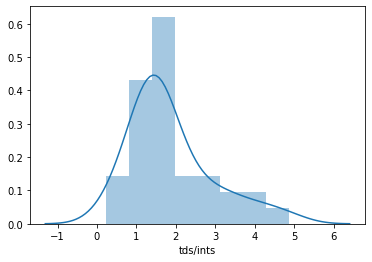

In [15]:
sns.distplot(qb_df["tds/ints"])